## Objective:

# To analyze health metrics in the diabetes dataset to identify key factors contributing to diabetes risk.

### Load and Inspect the Dataset
In this section, we will load the diabetes dataset and perform an initial inspection to understand its structure. We'll look at the first few rows of the dataset, check the data types, and identify any missing values.


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv('diabetes.csv')  # Replace 'diabetes.csv' with your actual file name

# Display the first few rows of the dataset
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Checking Data Types and Summary Statistics
We'll now check the data types of each column and generate summary statistics to get a sense of the distribution of values in each feature.


In [11]:
# Check data types
print(df.dtypes)

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.

### Data Cleaning and Preparation
This section involves handling any missing data and performing basic data manipulation. We'll fill missing values with the mean of each column and create new features if necessary.


In [12]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

# Verify no missing values remain
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


#### Basic Data Manipulation
We'll rename some columns for clarity and create a new feature, such as grouping ages into categories.


In [13]:
# Rename columns for clarity, if necessary
df.rename(columns={'BloodPressure': 'Blood_Pressure', 'SkinThickness': 'Skin_Thickness'}, inplace=True)

# Example of creating a new feature (e.g., Age Group)
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-29', '30-39', '40-49', '50-59', '60-69', '70-79'])


### Exploratory Data Analysis (EDA)
Here, we'll explore the data visually to uncover patterns and relationships between different features. We'll look at distributions, relationships between variables, and correlations.


#### Distribution of Key Features
Let's start by visualizing the distribution of key features like glucose levels and BMI.


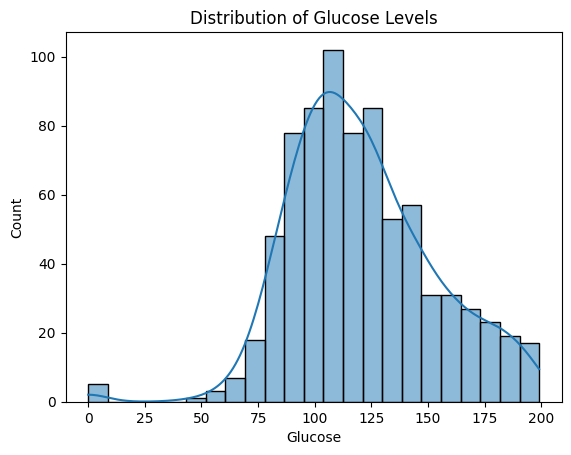

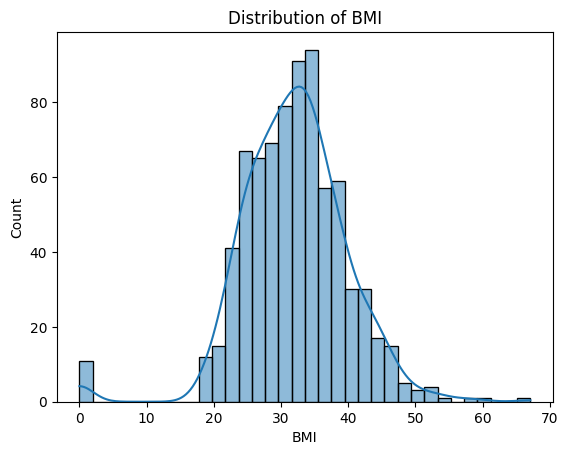

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of Glucose levels
sns.histplot(df['Glucose'], kde=True)
plt.title('Distribution of Glucose Levels')
plt.show()

# Distribution of BMI
sns.histplot(df['BMI'], kde=True)
plt.title('Distribution of BMI')
plt.show()


#### Relationship Between Features
Next, we'll explore the relationships between different features using scatter plots and boxplots.


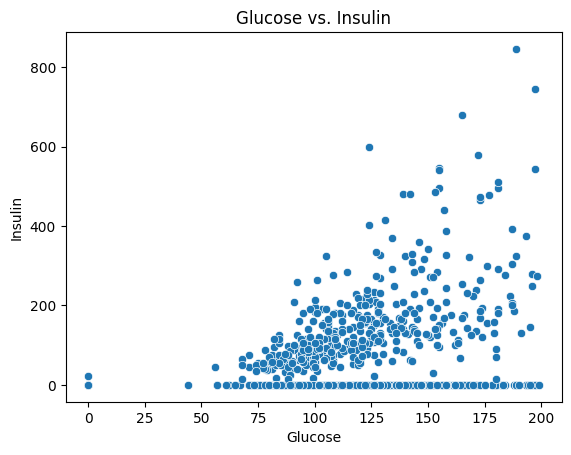

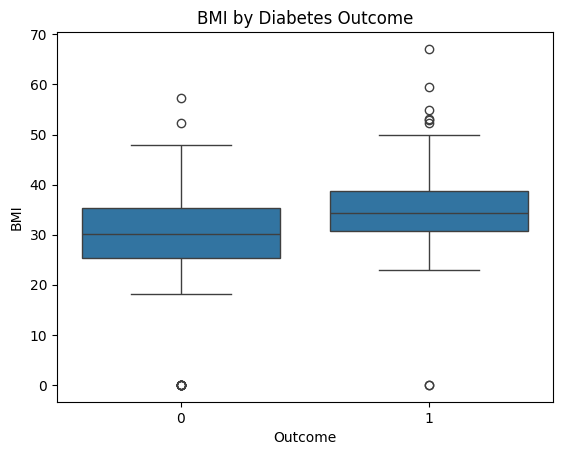

In [15]:
# Scatter plot of Glucose vs. Insulin
sns.scatterplot(x='Glucose', y='Insulin', data=df)
plt.title('Glucose vs. Insulin')
plt.show()

# Boxplot of BMI by Outcome (Diabetes)
sns.boxplot(x='Outcome', y='BMI', data=df)
plt.title('BMI by Diabetes Outcome')
plt.show()


#### Correlation Analysis
Finally, we'll generate a correlation matrix to understand how the features relate to each other and to the target variable (Outcome).


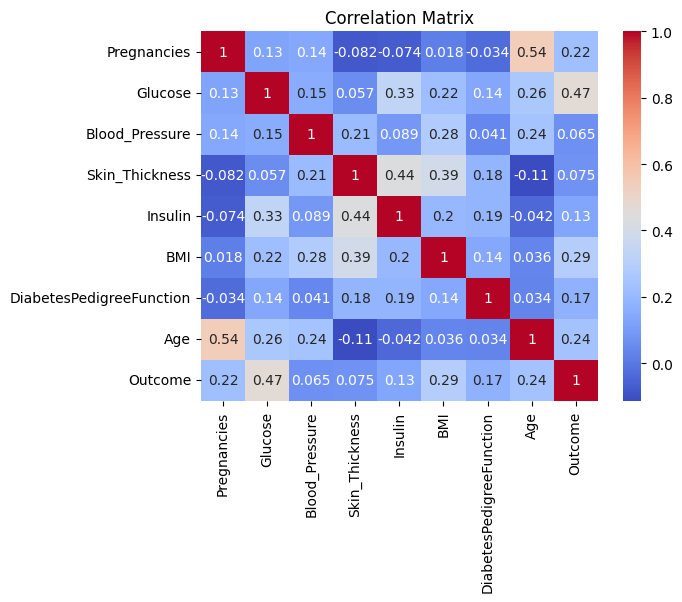

In [17]:
# Drop non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Summary of Findings
In this section, we summarize the key insights from our exploratory data analysis. These findings will help us understand the factors that might contribute to diabetes and guide any further analysis or modeling.

- **Glucose Levels**: Most patients have glucose levels within the normal range, but there are some outliers with significantly higher levels.
- **BMI**: The majority of patients are overweight, which could be a contributing factor to diabetes.
- **Glucose vs. Insulin**: There's a positive relationship between glucose and insulin levels, indicating that higher glucose levels might be associated with higher insulin levels.
- **Correlation Analysis**: BMI and glucose levels show a notable correlation with the outcome, suggesting their potential role in predicting diabetes risk.
